# Context
This dataset was downloaded from kaggle website which is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

# Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
import time
from pycaret.classification import *


## Data Loading

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Shape of the data is',data.shape)

Shape of the data is (768, 9)


# Understanding the data

### Fields description follow:

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

It is a Binary classification problen.

Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc.

In [5]:
# summarizing stats of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


***Dataset contain no null values and all columns are of numerical.***

***The target feature 'Outcome' is categerical encoded in 0/1 form 0:No and 1:Yes***

# Exploratory Data Analysis

In [7]:
# duplicate the data to avoid data loss
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


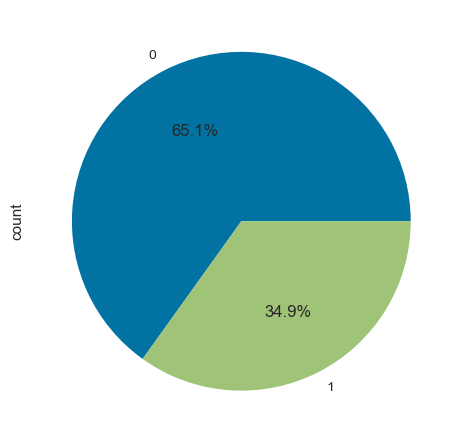

In [9]:
df['Outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

***Nearly  35% of patients are tested positive and 65% are tested negative***

In [10]:

corr=df.corr().transpose()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


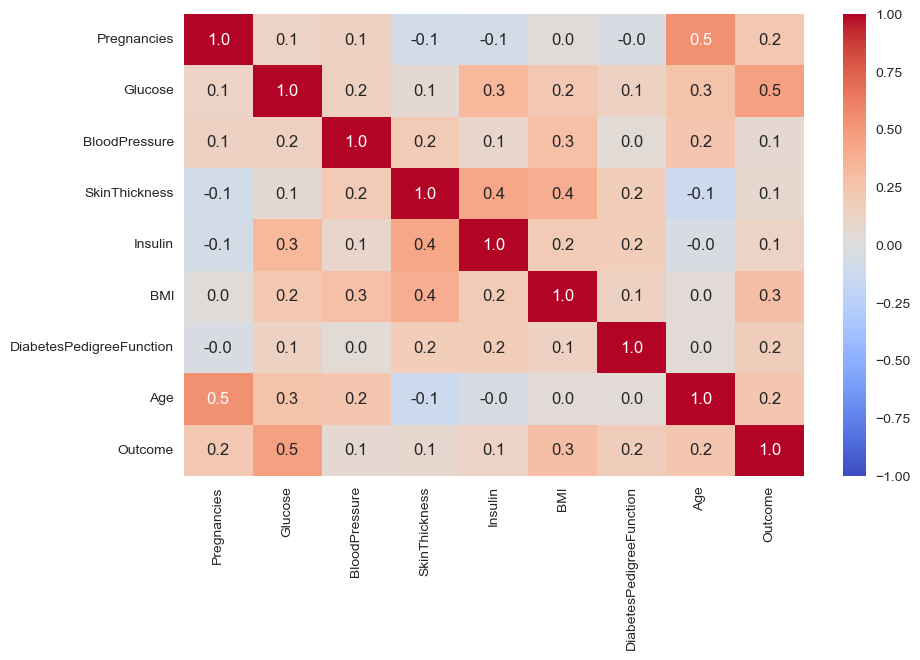

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap='coolwarm',annot=True,vmin=-1,vmax=1,fmt=".1f",)
plt.show()

### Key Observations:
- **Glucose and Outcome**: There is a moderately positive correlation (0.5), suggesting that higher glucose levels are associated with a higher likelihood of the outcome (possibly diabetes).
- **Pregnancies and SkinThickness**: There is little to no correlation (-0.1), indicating that the number of pregnancies does not significantly affect skin thickness.
- **Insulin and BMI**: There is a positive correlation (0.4), meaning higher insulin levels tend to be associated with higher BMI.

This heatmap helps in quickly identifying relationships between different health indicators, which can be crucial for medical research and diagnosis.

## Pair Plots for each column

<Figure size 1000x600 with 0 Axes>

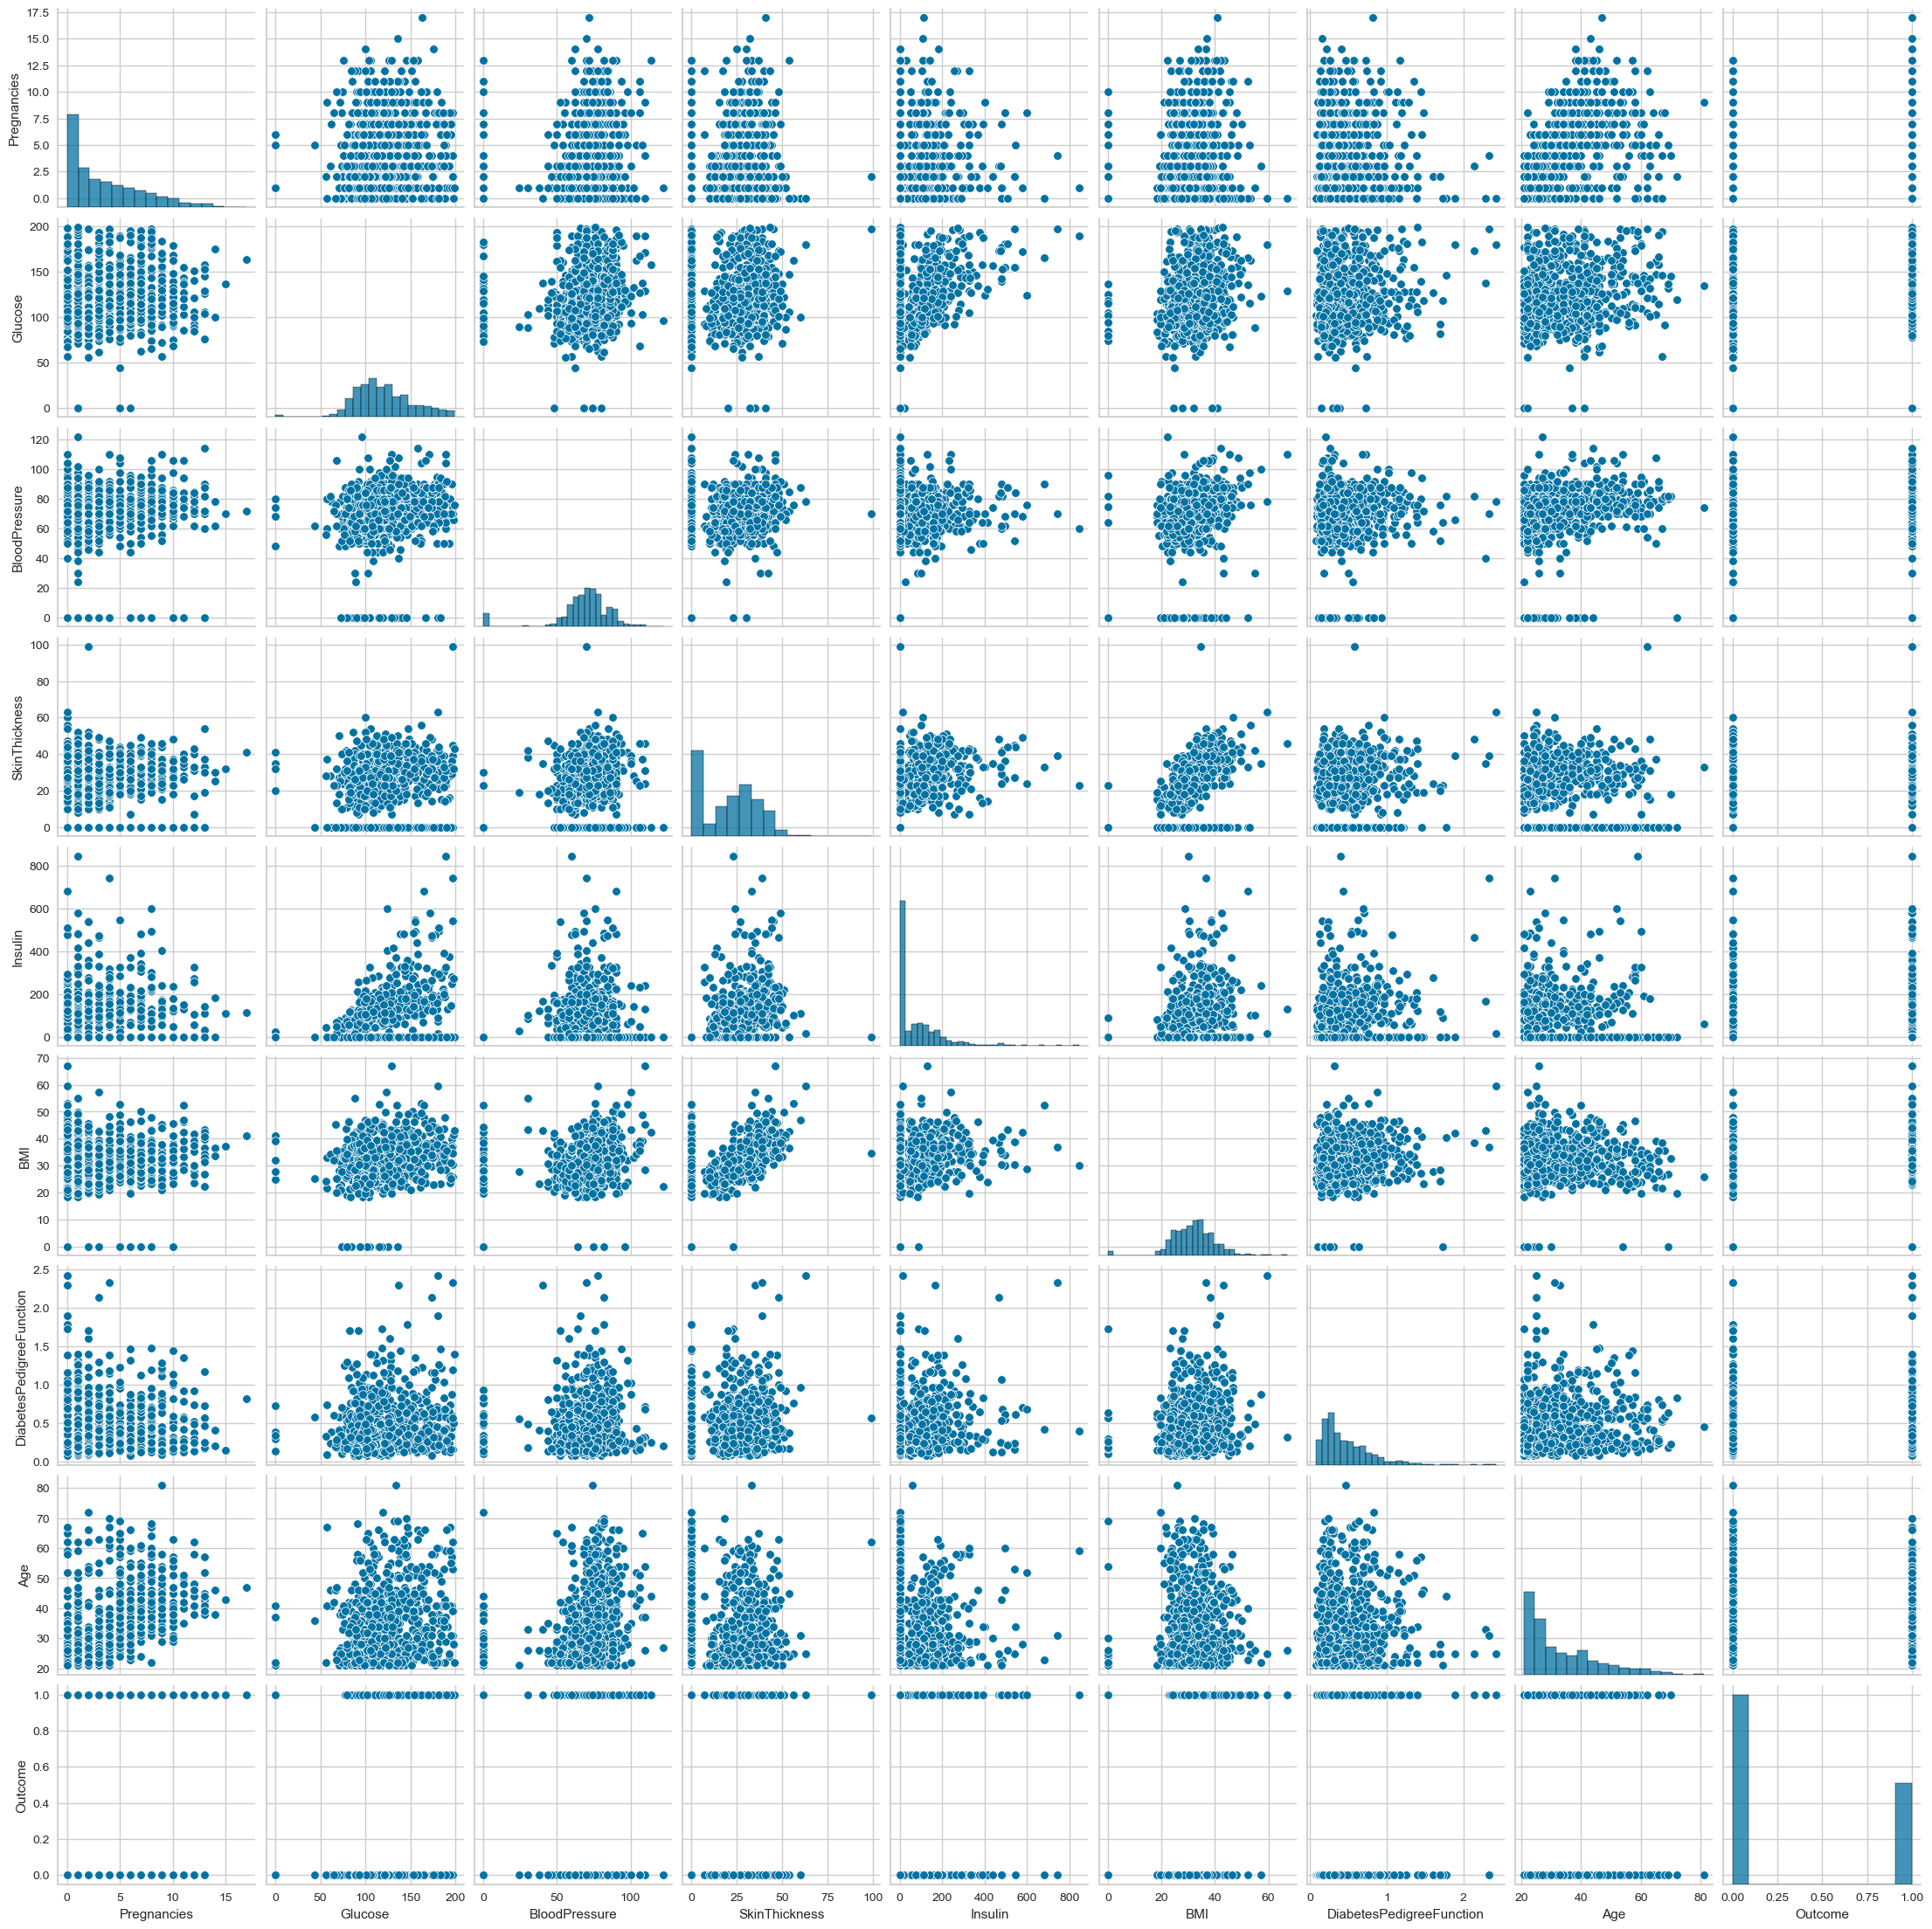

In [12]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()


### 1. **Pregnancies**
- **Pregnancies vs. Glucose**: The scatter plot shows a slight positive trend, indicating that higher numbers of pregnancies might be associated with higher glucose levels.
- **Pregnancies vs. BloodPressure**: There is no clear trend, suggesting little to no correlation.
- **Pregnancies vs. SkinThickness**: The scatter plot shows a slight positive trend, indicating a weak correlation.
- **Pregnancies vs. Insulin**: No clear trend is observed, indicating little to no correlation.
- **Pregnancies vs. BMI**: There is a slight positive trend, suggesting a weak correlation.
- **Pregnancies vs. DiabetesPedigreeFunction**: No clear trend, indicating little to no correlation.
- **Pregnancies vs. Age**: A positive trend is observed, indicating that older individuals tend to have more pregnancies.
- **Pregnancies vs. Outcome**: A slight positive trend, suggesting that more pregnancies might be associated with a higher likelihood of the outcome.

### 2. **Glucose**
- **Glucose vs. BloodPressure**: A slight positive trend, indicating a weak correlation.
- **Glucose vs. SkinThickness**: A slight positive trend, suggesting a weak correlation.
- **Glucose vs. Insulin**: A positive trend, indicating that higher glucose levels are associated with higher insulin levels.
- **Glucose vs. BMI**: A positive trend, suggesting that higher glucose levels are associated with higher BMI.
- **Glucose vs. DiabetesPedigreeFunction**: No clear trend, indicating little to no correlation.
- **Glucose vs. Age**: No clear trend, indicating little to no correlation.
- **Glucose vs. Outcome**: A positive trend, indicating that higher glucose levels are associated with a higher likelihood of the outcome.

### 3. **BloodPressure**
- **BloodPressure vs. SkinThickness**: A slight positive trend, indicating a weak correlation.
- **BloodPressure vs. Insulin**: No clear trend, indicating little to no correlation.
- **BloodPressure vs. BMI**: A slight positive trend, suggesting a weak correlation.
- **BloodPressure vs. DiabetesPedigreeFunction**: No clear trend, indicating little to no correlation.
- **BloodPressure vs. Age**: No clear trend, indicating little to no correlation.
- **BloodPressure vs. Outcome**: No clear trend, indicating little to no correlation.

### 4. **SkinThickness**
- **SkinThickness vs. Insulin**: A positive trend, indicating that higher skin thickness is associated with higher insulin levels.
- **SkinThickness vs. BMI**: A positive trend, suggesting that higher skin thickness is associated with higher BMI.
- **SkinThickness vs. DiabetesPedigreeFunction**: No clear trend, indicating little to no correlation.
- **SkinThickness vs. Age**: No clear trend, indicating little to no correlation.
- **SkinThickness vs. Outcome**: No clear trend, indicating little to no correlation.

### 5. **Insulin**
- **Insulin vs. BMI**: A positive trend, indicating that higher insulin levels are associated with higher BMI.
- **Insulin vs. DiabetesPedigreeFunction**: No clear trend, indicating little to no correlation.
- **Insulin vs. Age**: No clear trend, indicating little to no correlation.
- **Insulin vs. Outcome**: A slight positive trend, suggesting that higher insulin levels might be associated with a higher likelihood of the outcome.

### 6. **BMI**
- **BMI vs. DiabetesPedigreeFunction**: No clear trend, indicating little to no correlation.
- **BMI vs. Age**: No clear trend, indicating little to no correlation.
- **BMI vs. Outcome**: A slight positive trend, suggesting that higher BMI might be associated with a higher likelihood of the outcome.

### 7. **DiabetesPedigreeFunction**
- **DiabetesPedigreeFunction vs. Age**: No clear trend, indicating little to no correlation.
- **DiabetesPedigreeFunction vs. Outcome**: No clear trend, indicating little to no correlation.

### 8. **Age**
- **Age vs. Outcome**: A slight positive trend, suggesting that older age might be associated with a higher likelihood of the outcome.



## Distribution Plots for each column

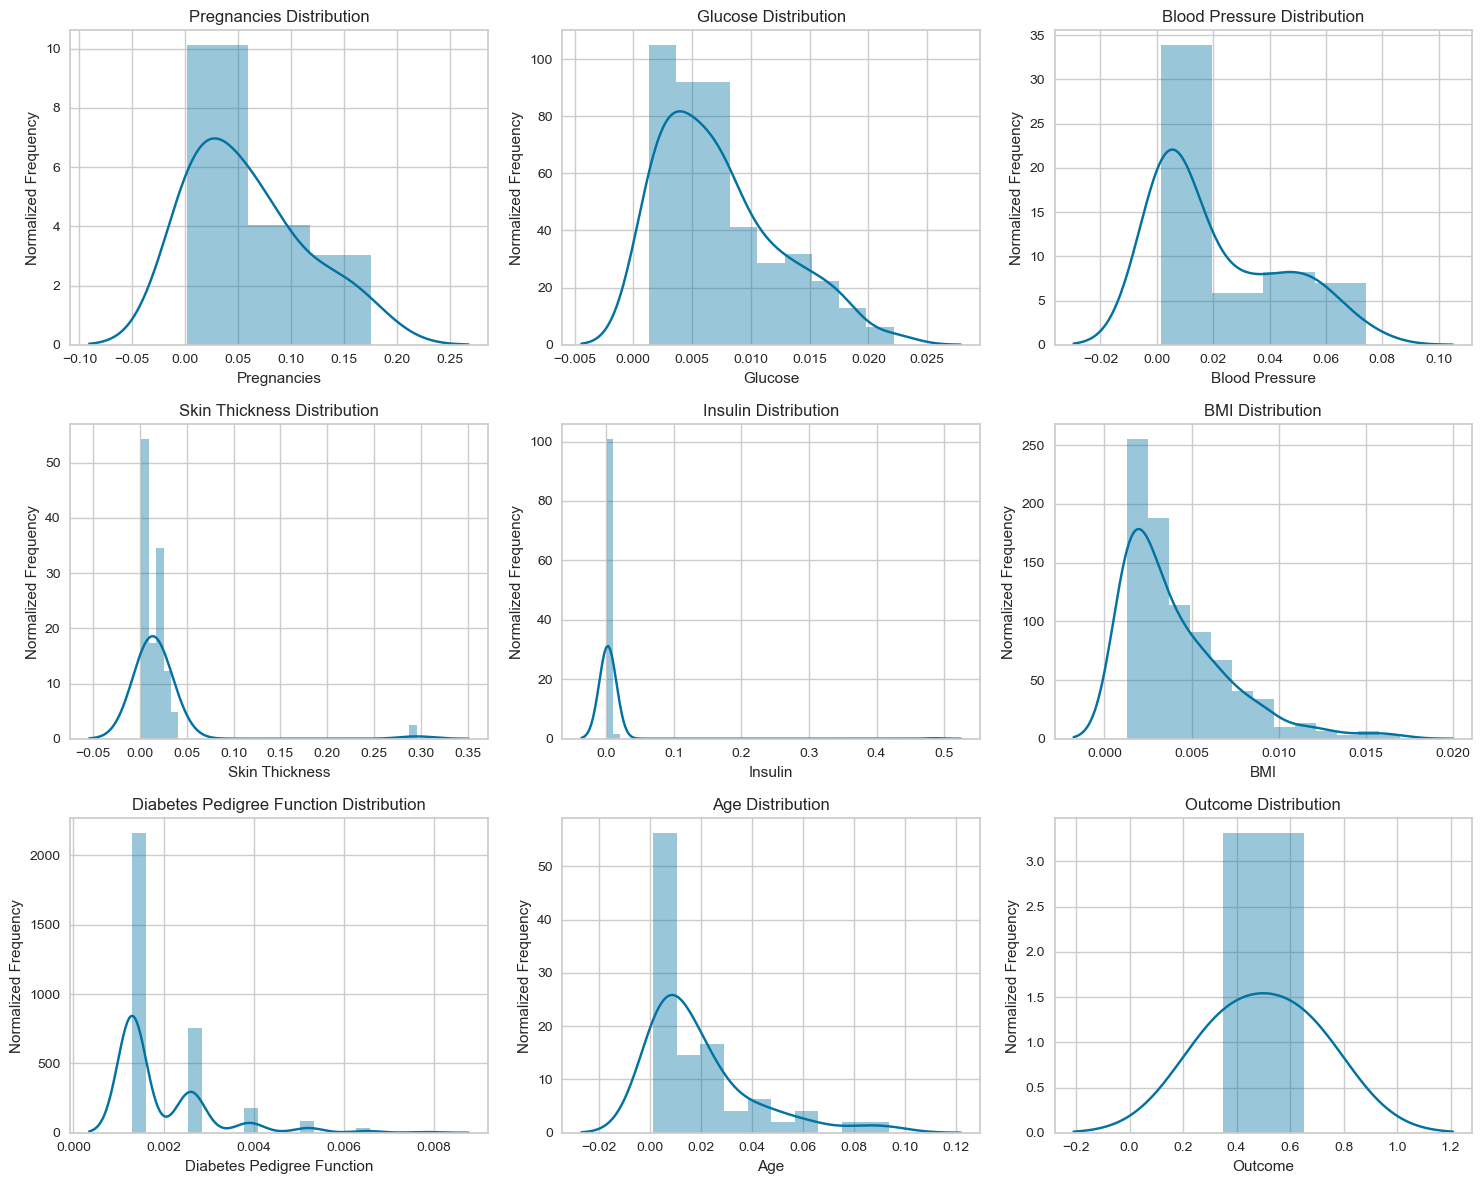

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Plot Age distribution
sns.distplot(df['Pregnancies'].value_counts(normalize=True).sort_index(), ax=axes[0, 0])
axes[0, 0].set(xlabel='Pregnancies', ylabel='Normalized Frequency', title='Pregnancies Distribution')

# Plot Gender distribution
sns.distplot(df['Glucose'].value_counts(normalize=True).sort_index(), ax=axes[0, 1])
axes[0, 1].set(xlabel='Glucose', ylabel='Normalized Frequency', title='Glucose Distribution')

# Plot Annual Income distribution
sns.distplot(df['BloodPressure'].value_counts(normalize=True).sort_index(), ax=axes[0, 2])
axes[0, 2].set(xlabel='Blood Pressure', ylabel='Normalized Frequency', title='Blood Pressure Distribution')

# Plot Number of Purchases distribution
sns.distplot(df['SkinThickness'].value_counts(normalize=True).sort_index(), ax=axes[1, 0])
axes[1, 0].set(xlabel='Skin Thickness', ylabel='Normalized Frequency', title='Skin Thickness Distribution')

# Plot Product Category distribution
sns.distplot(df['Insulin'].value_counts(normalize=True).sort_index(), ax=axes[1, 1])
axes[1, 1].set(xlabel='Insulin', ylabel='Normalized Frequency', title='Insulin Distribution')

# Plot Time Spent on Website distribution
sns.distplot(df['BMI'].value_counts(normalize=True).sort_index(), ax=axes[1, 2])
axes[1, 2].set(xlabel='BMI', ylabel='Normalized Frequency', title='BMI Distribution')

# Plot Loyalty Program distribution
sns.distplot(df['DiabetesPedigreeFunction'].value_counts(normalize=True).sort_index(), ax=axes[2, 0])
axes[2, 0].set(xlabel='Diabetes Pedigree Function', ylabel='Normalized Frequency', title='Diabetes Pedigree Function Distribution')

# Plot Discounts Availed distribution
sns.distplot(df['Age'].value_counts(normalize=True).sort_index(), ax=axes[2, 1])
axes[2, 1].set(xlabel='Age', ylabel='Normalized Frequency', title='Age Distribution')

# Plot Purchase Status distribution
sns.distplot(df['Outcome'].value_counts(normalize=True).sort_index(), ax=axes[2, 2])
axes[2, 2].set(xlabel='Outcome', ylabel='Normalized Frequency', title='Outcome Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


***Distribution plots provide a visual summary of the data, helping to identify patterns, central tendencies, and potential outliers***

1. **Pregnancies Distribution**: This plot shows the number of pregnancies among the individuals in the dataset. It appears to be right-skewed, indicating that most individuals have fewer pregnancies, with a few having a higher number.

2. **Glucose Distribution**: This plot represents the glucose levels. It seems to follow a normal distribution, with most values clustered around the mean and fewer values at the extremes.

3. **Blood Pressure Distribution**: This plot shows the distribution of blood pressure readings. It also appears to be normally distributed, with a peak around the average blood pressure value.

4. **Skin Thickness Distribution**: This plot displays the skin thickness measurements. The distribution is somewhat uniform, indicating a wide range of skin thickness values without a clear peak.

5. **Insulin Distribution**: This plot shows the insulin levels. It is right-skewed, suggesting that most individuals have lower insulin levels, with a few having very high levels.

6. **BMI (Body Mass Index) Distribution**: This plot represents BMI values. It appears to be normally distributed, with most values centered around the mean BMI.

7. **Diabetes Pedigree Function Distribution**: This plot shows the diabetes pedigree function, which indicates the likelihood of diabetes based on family history. The distribution is right-skewed, with most values being low and a few high.

8. **Age Distribution**: This plot represents the age of individuals. It is right-skewed, indicating that there are more younger individuals in the dataset, with fewer older individuals.

9. **Outcome Distribution**: This plot shows the outcome variable, likely indicating whether an individual has diabetes (1) or not (0). It appears to be a binary distribution with two distinct peaks at 0 and 1.


## Checking Outlier's

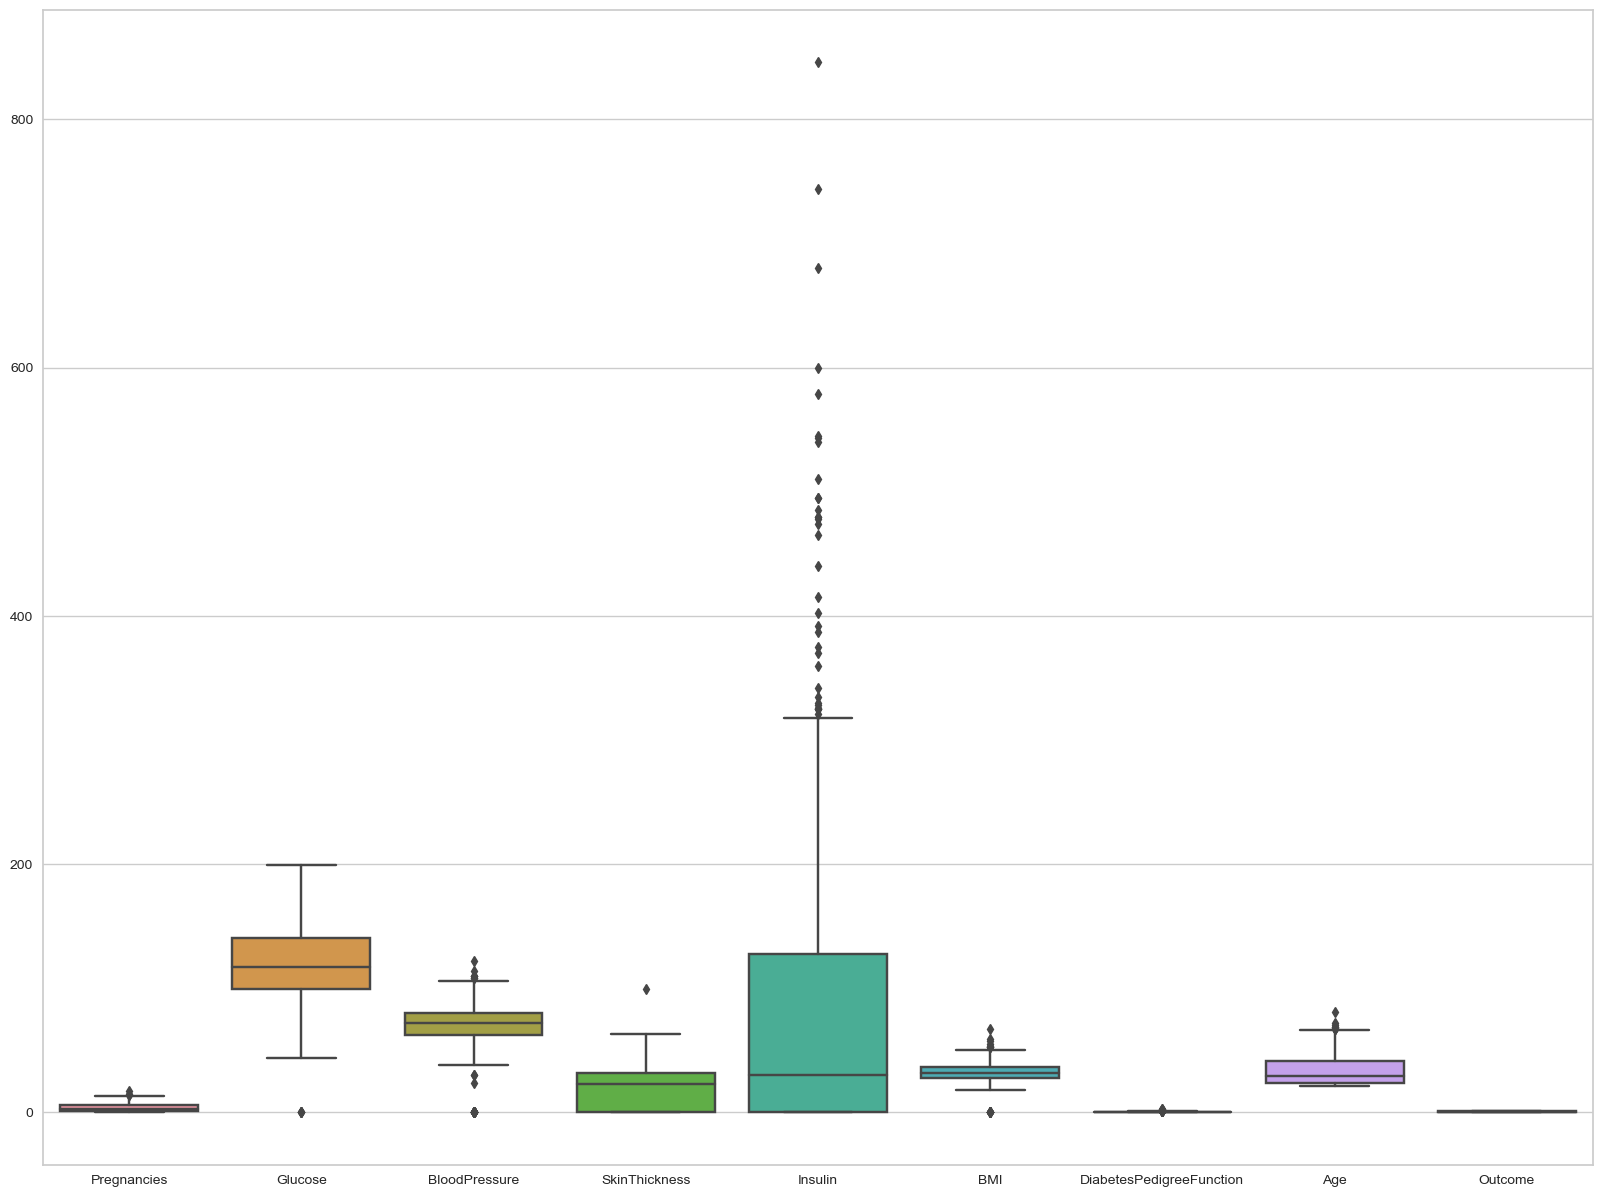

In [14]:
plt.figure(figsize=(20,15))
sns.boxplot(df)
plt.show()

***Box plots are useful for identifying the central tendency, variability, and outliers in the data.***

1. **Pregnancies**: This box plot shows the distribution of the number of pregnancies. The median is around 2, with a few outliers on the higher end, indicating some individuals have significantly more pregnancies than the majority.

2. **Glucose**: The glucose levels have a higher median and a wider interquartile range (IQR), suggesting more variability in glucose levels among individuals. There are also some outliers on the higher end.

3. **Blood Pressure**: Blood pressure readings have a median around the middle of the range, with a few outliers on both the lower and higher ends, indicating some individuals have unusually low or high blood pressure.

4. **Skin Thickness**: This plot shows a relatively wide IQR and several outliers, indicating variability in skin thickness measurements and some extreme values.

5. **Insulin**: Insulin levels have a large number of outliers, suggesting that while most individuals have insulin levels within a certain range, there are quite a few with significantly higher levels.

6. **BMI (Body Mass Index)**: The BMI distribution shows a median around the middle of the range with some outliers, indicating that most individuals have BMI values within a certain range, but there are a few with much higher or lower values.

7. **Diabetes Pedigree Function**: This plot shows the likelihood of diabetes based on family history. The median is low, with a few high outliers, indicating that most individuals have a low diabetes pedigree function, but some have a significantly higher likelihood.

8. **Age**: The age distribution shows a median around the middle of the range with some outliers, indicating that while most individuals fall within a certain age range, there are a few much older or younger individuals.

9. **Outcome**: This plot likely represents a binary variable (e.g., 0 for no diabetes, 1 for diabetes). It shows two distinct lines, indicating the two possible outcomes.


## Outlier Treatment


In [15]:
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR))| (dataframe > (Q3 + 1.5*IQR))).any(axis=1)]
    return df_rem_out

df = outlier_treatment(df)

In [16]:
shape_percentage = (df.shape[0] / data.shape[0]) * 100
print(f"Shape percentage after treating outliers: {shape_percentage}%")

Shape percentage after treating outliers: 83.203125%


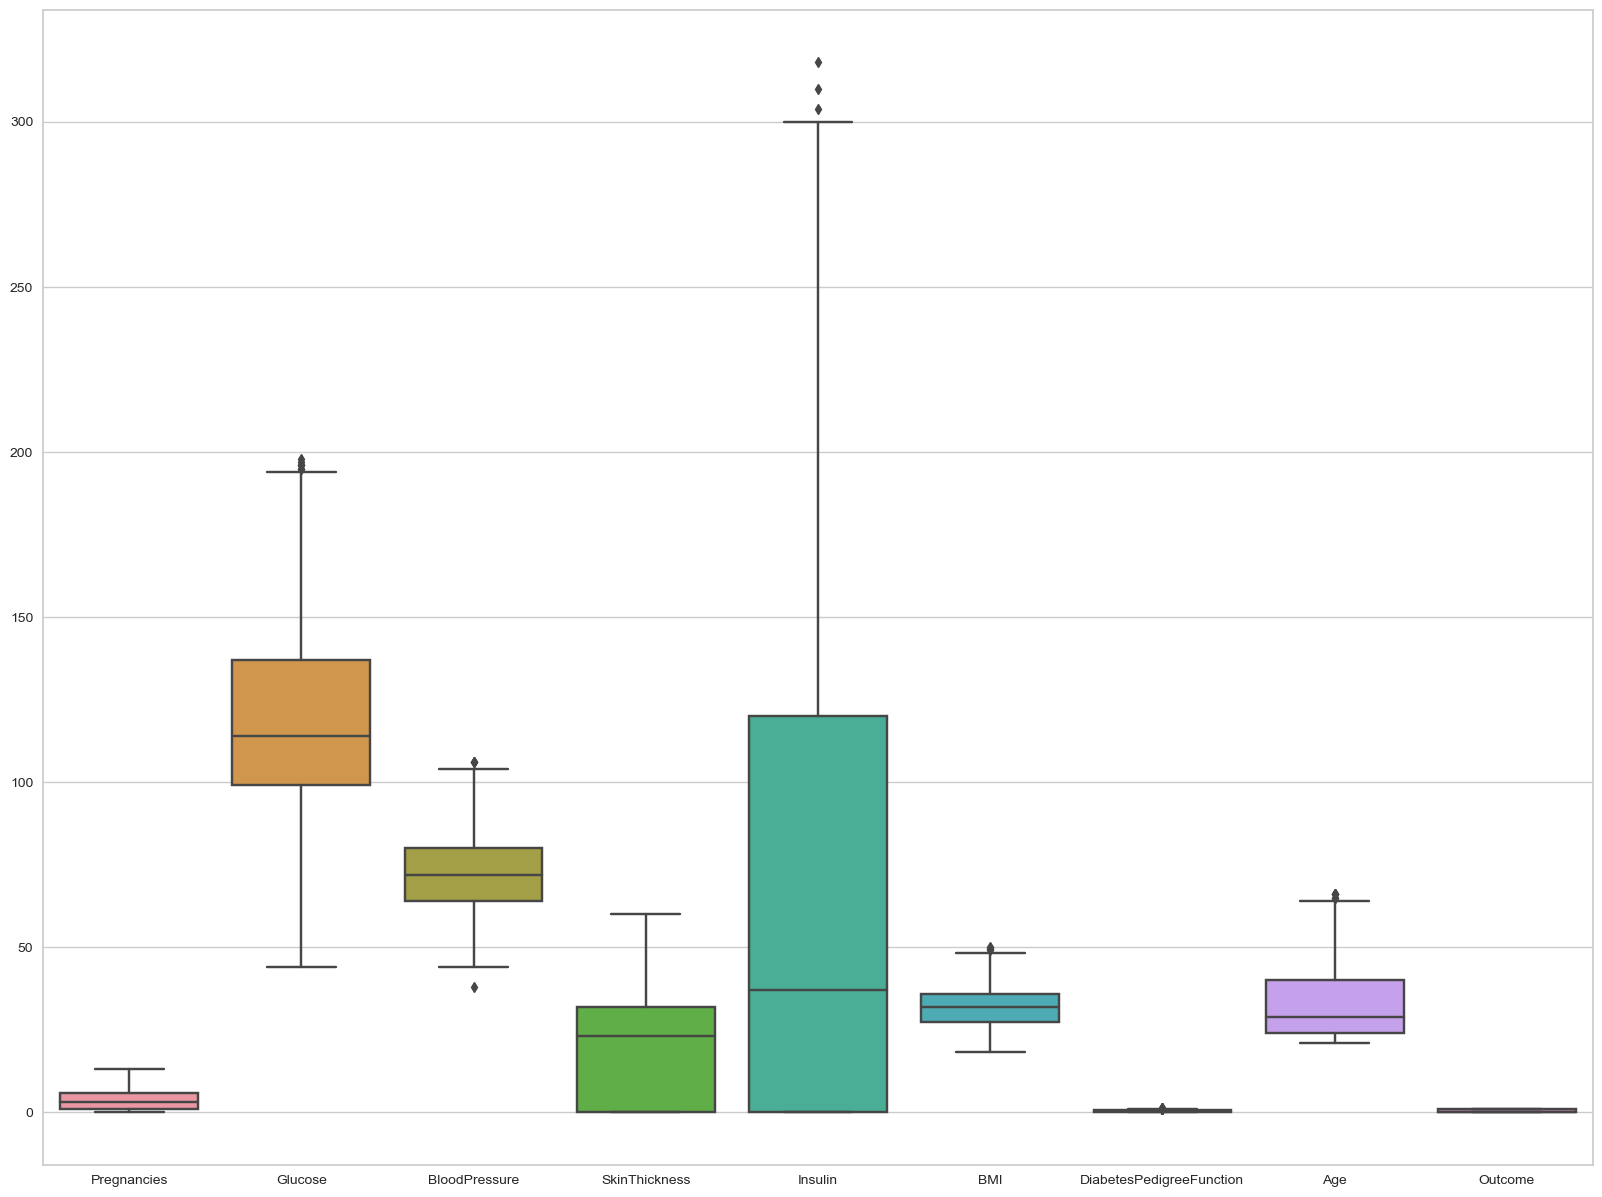

In [17]:
# checking for outliers
plt.figure(figsize=(20,15))
sns.boxplot(df)
plt.show()

***After treating outliers we are left with 83% of data with minimized outliers***

# Model Selection using pycaret

PyCaret's classification module (pycaret.classification) is a supervised machine learning module which is used for classifying the elements into a binary group based on various techniques and algorithms. Some common use cases of classification problems include predicting customer default (yes or no), customer churn (customer will leave or stay), disease found (positive or negative).

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

### Setting up Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [79]:
c=setup(df,target='Outcome',train_size=0.8,session_id=8795)

,Description,Value
0,Session id,8795
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(639, 9)"
4,Transformed data shape,"(639, 9)"
5,Transformed train set shape,"(511, 9)"
6,Transformed test set shape,"(128, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


***Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:***

##### session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 8549 for later reproducibility.

##### Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

##### Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

##### Original Data : Displays the original shape of the dataset. In this experiment (639, 9) means 639 samples and 9 features including the target column.

##### Numeric Features : The number of features inferred as numeric. In this dataset, 8 out of 9 features are inferred as numeric.

##### Transformed Train Set Shape: Displays the shape of the transformed training set. Notice that the original shape of(639, 9) is transformed into (511, 9) for the transformed train set.

##### Transformed Test Set Shape : Displays the shape of the transformed test/hold-out set. There are 128 samples in test/hold-out set. This split is based on the default value of 80/20 that can be changed using the train_size parameter in setup.


In [80]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7906,0.8099,0.5875,0.7052,0.6269,0.4863,0.4986,0.1240
catboost,CatBoost Classifier,0.7886,0.8206,0.5750,0.7127,0.6279,0.4838,0.4950,1.3460
ridge,Ridge Classifier,0.7789,0.8248,0.5062,0.7048,0.5811,0.4395,0.4540,0.0170
lr,Logistic Regression,0.7769,0.8232,0.5188,0.6994,0.5883,0.4418,0.4549,0.0270
lda,Linear Discriminant Analysis,0.7750,0.8250,0.5125,0.6945,0.5815,0.4349,0.4483,0.0200
et,Extra Trees Classifier,0.7710,0.7964,0.4938,0.6879,0.5663,0.4194,0.4340,0.1210
qda,Quadratic Discriminant Analysis,0.7709,0.8071,0.5688,0.6634,0.6076,0.4479,0.4539,0.0210
ada,Ada Boost Classifier,0.7690,0.8047,0.6062,0.6591,0.6242,0.4587,0.4654,0.0890
rf,Random Forest Classifier,0.7670,0.8126,0.5438,0.6724,0.5944,0.4342,0.4437,0.1580
nb,Naive Bayes,0.7651,0.8066,0.6062,0.6293,0.6151,0.4468,0.4487,0.0170


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=8795, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

***Based on these metrics, Gradient Boosting Classifier seem to perform well across most metrics, with high accuracy, AUC scores.***


In [102]:
best=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8077,0.8490,0.5625,0.7500,0.6429,0.5149,0.5249
1,0.8235,0.8732,0.8750,0.6667,0.7568,0.6222,0.6364
2,0.7843,0.7857,0.5625,0.6923,0.6207,0.4722,0.4772
3,0.7451,0.7268,0.5625,0.6000,0.5806,0.3978,0.3982
4,0.7647,0.8482,0.3125,0.8333,0.4545,0.3419,0.4089
5,0.8627,0.8661,0.7500,0.8000,0.7742,0.6757,0.6765
6,0.6667,0.6732,0.3125,0.4545,0.3704,0.1541,0.1592
7,0.7059,0.7268,0.5000,0.5333,0.5161,0.3052,0.3055
8,0.8824,0.9304,0.8125,0.8125,0.8125,0.7268,0.7268


In [106]:
#trained model object is stored in the variable 'lr'. 
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=8795, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Tune a Model

When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

In [107]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8269,0.9132,0.5625,0.8182,0.6667,0.5551,0.5729
1,0.7451,0.8446,0.6250,0.5882,0.6061,0.4179,0.4183
2,0.8235,0.7893,0.5625,0.8182,0.6667,0.5522,0.5701
3,0.7059,0.7732,0.5625,0.5294,0.5455,0.3284,0.3287
4,0.8431,0.8625,0.5625,0.9000,0.6923,0.5944,0.6240
5,0.8039,0.8607,0.6875,0.6875,0.6875,0.5446,0.5446
6,0.7059,0.7125,0.3125,0.5556,0.4000,0.2249,0.2413
7,0.6275,0.7179,0.3125,0.3846,0.3448,0.0884,0.0894
8,0.8824,0.9250,0.7500,0.8571,0.8000,0.7172,0.7204


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### Plot a Model
Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

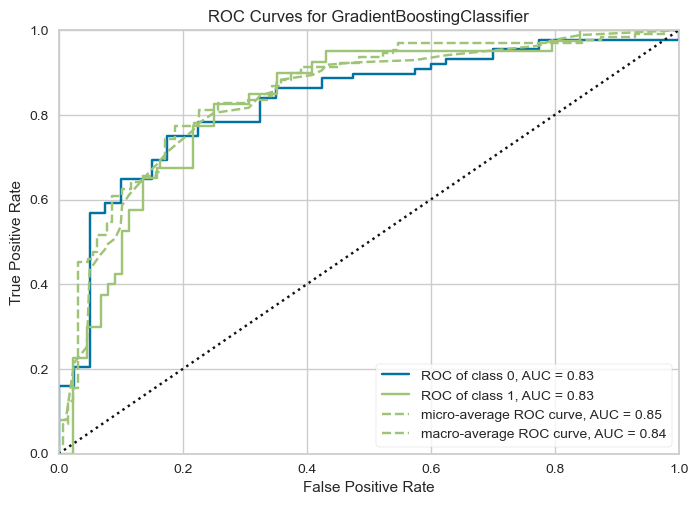

In [108]:
plot_model(best, plot = 'auc') # AUC Curve


## ROC (Receiver Operating Characteristic) curves for a **GradientBoostingClassifier**. 

### Axes
- **X-axis (False Positive Rate)**: This measures the proportion of actual negatives that are incorrectly classified as positives.
- **Y-axis (True Positive Rate)**: This measures the proportion of actual positives that are correctly classified.

### Curves
- **ROC of class 0 (dashed line)**: This curve represents the performance of the classifier for class 0, with an AUC (Area Under the Curve) of 0.83.
- **ROC of class 1 (solid line)**: This curve represents the performance of the classifier for class 1, also with an AUC of 0.83.
- **Micro-average ROC curve (dot-dashed line)**: This curve aggregates the contributions of all classes to compute the average performance, with an AUC of 0.85.
- **Macro-average ROC curve (dot-dashed line)**: This curve computes the average performance by averaging the AUCs of each class, with an AUC of 0.84.

### Interpretation
- **AUC (Area Under the Curve)**: The AUC value ranges from 0 to 1, where 1 indicates perfect classification and 0.5 indicates random guessing. In this case, the AUC values (0.83, 0.84, and 0.85) suggest that the GradientBoostingClassifier performs well in distinguishing between the classes.
- **Closer to Top Left Corner**: The closer the ROC curve is to the top left corner, the better the model is at predicting true positives while minimizing false positives.

### Conclusion
The ROC curves indicate that the GradientBoostingClassifier has a good performance in distinguishing between the classes, with high AUC values for both individual classes and the average curves.



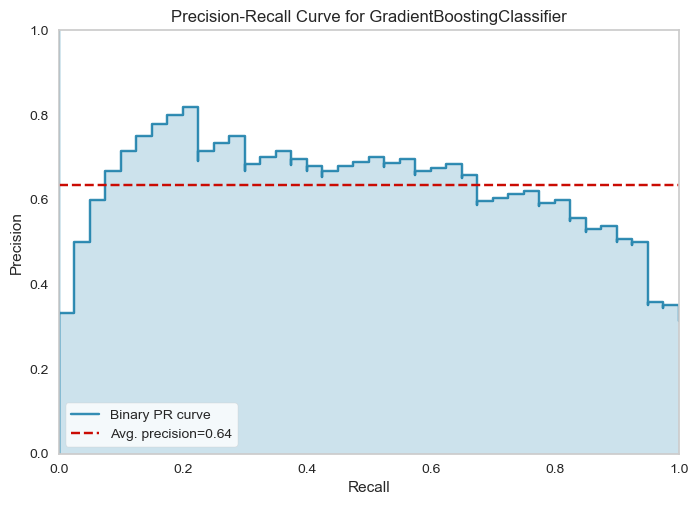

In [109]:
plot_model(best, plot = 'pr') # Precision-Recall Curve


## **Precision-Recall Curve** for a **GradientBoostingClassifier**.

### Axes
- **X-axis (Recall)**: This measures the proportion of actual positives that are correctly identified by the model (True Positive Rate).
- **Y-axis (Precision)**: This measures the accuracy of positive predictions (the proportion of true positive predictions out of all positive predictions).

### Curve
- **Blue Line**: This step-like line represents the trade-off between precision and recall for different threshold settings of the classifier. As you move along the curve, you can see how precision and recall change.
- **Red Dashed Line**: This horizontal line indicates the average precision score, labeled as "Avg. precision=0.64". This means that, on average, the classifier's precision is 0.64 across all thresholds.

### Interpretation
- **Precision-Recall Trade-off**: The curve shows how the classifier's precision and recall vary with different thresholds. A higher area under the curve indicates better performance.
- **Average Precision**: An average precision of 0.64 suggests that the classifier performs reasonably well, but there is room for improvement.

### Conclusion
The Precision-Recall Curve provides insights into the classifier's performance, especially in scenarios where the class distribution is imbalanced. The average precision score of 0.64 indicates a moderate performance, and the curve helps in understanding how precision and recall trade-off at different thresholds.


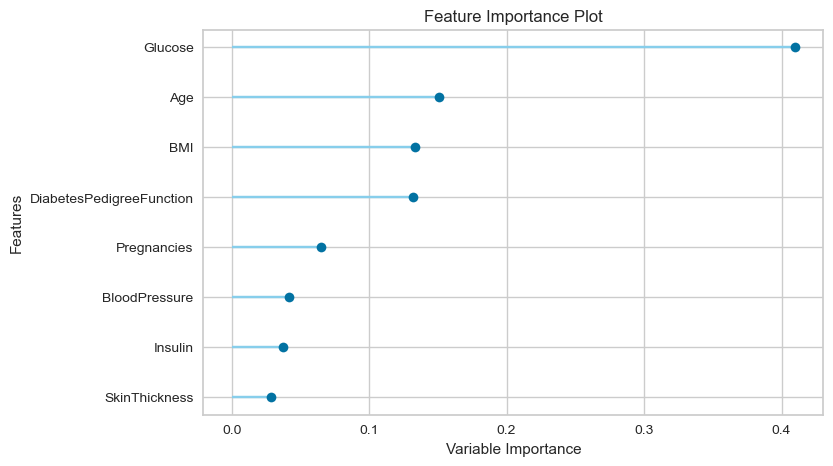

In [110]:
plot_model(best, plot='feature') # Feature Importance


## **Feature Importance Plot** for a machine learning model. Here's a breakdown of what the plot represents:

### Axes
- **X-axis (Variable Importance)**: This measures the importance of each feature in the model, ranging from 0.0 to 0.4.
- **Y-axis (Features)**: This lists the features used in the model, such as Glucose, Age, BMI, DiabetesPedigreeFunction, Pregnancies, BloodPressure, Insulin, and SkinThickness.

### Features and Their Importance
- **Glucose**: This feature has the highest importance, just under 0.4, indicating it is the most influential variable in the model.
- **Age**: The second most important feature, with an importance value slightly above 0.2.
- **BMI (Body Mass Index)**: Also has a significant importance, close to 0.2.
- **DiabetesPedigreeFunction**: This feature has a moderate importance, around 0.15.
- **Pregnancies**: Slightly less important than DiabetesPedigreeFunction, with a value around 0.1.
- **BloodPressure**: Has a lower importance, just under 0.1.
- **Insulin**: Similar importance to BloodPressure, slightly above 0.05.
- **SkinThickness**: The least important feature, with an importance value around 0.05.

### Interpretation
- **High Importance Features**: Glucose, Age, and BMI are the most critical features for the model, meaning they have the most significant impact on the model's predictions.
- **Moderate Importance Features**: DiabetesPedigreeFunction and Pregnancies also contribute meaningfully to the model but to a lesser extent.
- **Low Importance Features**: BloodPressure, Insulin, and SkinThickness have the least influence on the model's predictions.

### Conclusion
Understanding feature importance helps in interpreting the model and identifying which variables are most influential in making predictions. This can be useful for feature selection, model tuning, and gaining insights into the underlying data.


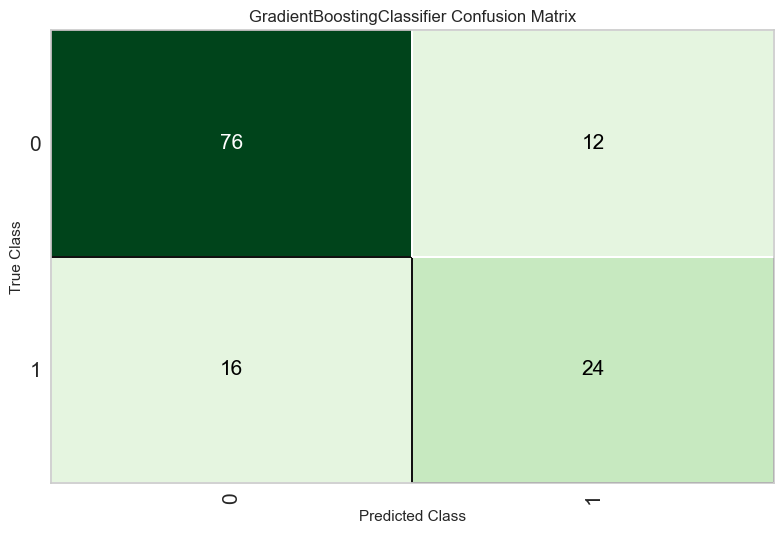

In [111]:
plot_model(best, plot = 'confusion_matrix') # Confution Matrix

## **Confusion matrix** for a **Gradient Boosting Classifier**. Here's a breakdown of what the matrix represents:

### Axes
- **X-axis (Predicted Class)**: This shows the predicted classes by the model, labeled as '0' and '1'.
- **Y-axis (True Class)**: This shows the actual classes, also labeled as '0' and '1'.

### Quadrants
- **Top Left (True Negatives - TN)**: 76 instances where the actual class was '0' and the model correctly predicted '0'.
- **Top Right (False Positives - FP)**: 12 instances where the actual class was '0' but the model incorrectly predicted '1'.
- **Bottom Left (False Negatives - FN)**: 16 instances where the actual class was '1' but the model incorrectly predicted '0'.
- **Bottom Right (True Positives - TP)**: 24 instances where the actual class was '1' and the model correctly predicted '1'.



### Conclusion
The confusion matrix indicates a reasonably good performance for a Gradient Boosting Classifier model, but the suitability depends on your specific requirements. If you need higher recall or precision, you might consider tuning the model or trying different algorithms.


### Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead us to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (20% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [112]:
final = finalize_model(best)


In [113]:
print(final)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                (...
                         

In [114]:
predict_model(final);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9219,0.9690,0.8000,0.9412,0.8649,0.8104,0.8157


Notice how the parameters in finalized model has increased, even though the model is the same. This is because the finalized model variable has been trained on the complete dataset including the test/hold-out set.

### Predicting on unseen data

In [115]:
data = df.sample(frac=0.95, random_state=42).reset_index(drop=True)
data_unseen = df.drop(df.index[data.index]).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (607, 9)
Unseen Data For Predictions: (32, 9)


In [116]:
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9688,1.0000,1.0000,0.9286,0.9630,0.9360,0.9379


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,4,95,60,32,0,35.400002,0.284,28,0,0,0.9103
1,0,126,86,27,120,27.400000,0.515,21,0,0,0.9223
2,8,65,72,23,0,32.000000,0.600,42,0,0,0.9206
3,2,99,60,17,160,36.599998,0.453,21,0,0,0.9311
4,1,102,74,0,0,39.500000,0.293,42,1,1,0.5281


The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

### Saving the model

In [122]:
save_model(final,'Final GBC Model 05SEP2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          

In [123]:
saved_final = load_model('Final GBC Model 05SEP2024')


Transformation Pipeline and Model Successfully Loaded


# Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [124]:
new_prediction = predict_model(saved_final, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9688,1.0000,1.0000,0.9286,0.9630,0.9360,0.9379


In [125]:
new_prediction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,4,95,60,32,0,35.400002,0.284,28,0,0,0.9103
1,0,126,86,27,120,27.400000,0.515,21,0,0,0.9223
2,8,65,72,23,0,32.000000,0.600,42,0,0,0.9206
3,2,99,60,17,160,36.599998,0.453,21,0,0,0.9311
4,1,102,74,0,0,39.500000,0.293,42,1,1,0.5281


## Conclusion
Gradient Boosting Classifier with 80:20 ratio training gives the best accuracy of 92% to predict model that estimates the likelihood of a customer making a purchase.